In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

Read the data from  Helsingin Sanomat (https://github.com/HS-Datadesk/koronavirus-avoindata)

In [2]:
data = requests.get("https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaData")
data_json = data.json()
#Take only the data for confirmed cases:
df = pd.DataFrame.from_dict(data_json["confirmed"])
print(df.head())
print(df.describe())

                       date healthCareDistrict id infectionSource  \
0  2020-01-29T11:00:00.000Z              Lappi  1         unknown   
1  2020-02-26T11:00:00.000Z                HUS  2         unknown   
2  2020-03-01T11:00:00.000Z                HUS  3               2   
3  2020-02-28T11:00:00.000Z                HUS  4         unknown   
4  2020-03-01T11:00:00.000Z                HUS  5               4   

  infectionSourceCountry  
0                    CHN  
1                    ITA  
2                    FIN  
3                    ITA  
4                    FIN  
                            date healthCareDistrict   id infectionSource  \
count                        224                224  224             224   
unique                        40                 17  224              11   
top     2020-03-14T09:20:00.000Z                HUS  122         unknown   
freq                          47                117    1             208   

       infectionSourceCountry  
count     

Now, we'll take only the dates and id's of the confirmed cases of COVID-19.
There are 223 (at the time) confirmed cases with all having their own timestamps.
Then we group them to get the daily confirmed cases.

In [13]:
df_ts = df[['date','id']]
new_dates = pd.Series([x[:10] for x in df['date'].values],name='new_dates')
new_dates_s = new_dates.str.split('-',expand=True)
new_dates_s = new_dates_s.rename(columns = {0:'year',1:'month',2:'day'})

df_ts = pd.concat([df_ts,new_dates_s],axis=1)
df_ts = df_ts.loc[:,"id":"day"].rename(columns={'id':'count'})
df_ts = df_ts.groupby(['year','month','day']).count()


covid1 = pd.Series(df_ts['count'].values,name = 'count')
covid2 = pd.Series(new_dates.unique(),name="date").sort_values()
covid = pd.concat([pd.to_datetime(covid2).reset_index(),covid1],axis=1)
covid["date"] = pd.to_datetime(covid['date'])
covid = covid.set_index('date').drop('index',axis=1)
print(covid)


            count
date             
2020-01-29      1
2020-02-26      1
2020-02-28      1
2020-03-01      3
2020-03-02      1
2020-03-05      5
2020-03-06      3
2020-03-07      4
2020-03-08      5
2020-03-09      9
2020-03-10      7
2020-03-11     25
2020-03-12     46
2020-03-13     44
2020-03-14     69


Get the cumulative sum of the confirmed cases and visualise the daily counts and cumulative sum.

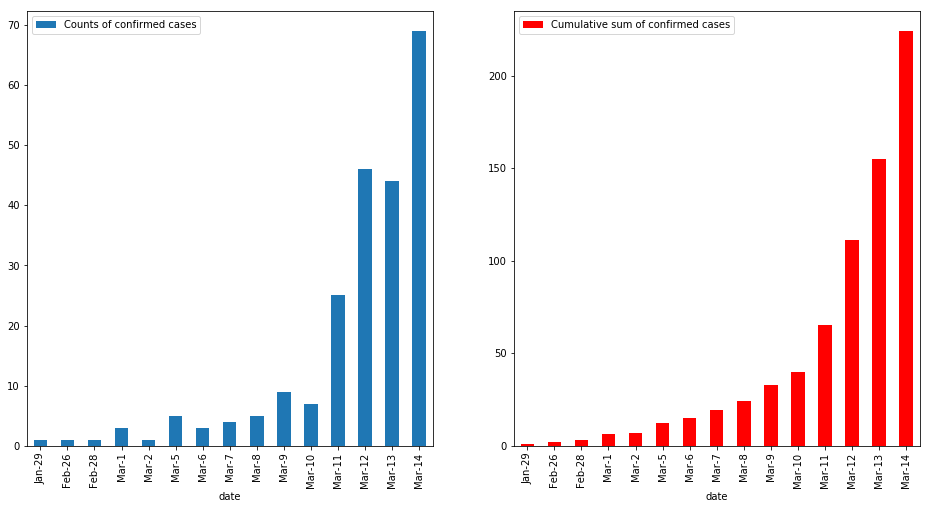

In [39]:
covid['cum_sum'] = covid['count'].cumsum()

# date_mapping = [lambda x: "{}-{}".format(x.strftime("%b"),x.day),covid.index]
date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in covid.index]
fig,axes = plt.subplots(1,2,figsize=(16,8))


covid.plot.bar(y='count',ax=axes[0],label="Counts of confirmed cases")
axes[0].set_xticklabels(date_mapping);

covid.plot.bar(y = 'cum_sum',ax=axes[1],color = 'red',label="Cumulative sum of confirmed cases")
axes[1].set_xticklabels(date_mapping);



